<header style="width: 100%; background-color: #eaeaea;">
    <br>
    <h1 style="text-align: center;">Praktikum Metode Seismik: Pertemuan 1</h1>
    <br>
    <br>
</header>

## Overview
1. [Sampling time/frekuensi *](#Sampling-time/frekuensi)
2. [Deret Data](#Deret-Data)
    * [Contoh Deret Data](#Contoh-Deret-Data)
    * [Visualisasi Deret Data](#Visualisasi-Deret-Data)
3. [Penjumlahan & Pengurangan Deret Data](#Penjumlahan-&-Pengurangan-Deret-Data)
5. [Nyquist](#Nyquist)
6. [Konvolusi dan Korelasi](#Konvolusi-dan-Korelasi)
    * [Konvolusi](#Konvolusi)
       * [Contoh](#Contoh)
           * [Dummy Data](#Dummy-Data)
           * [Ricker Wavelet](#Ricker-Wavelet)
           * [Visualisasi](#Visualisasi)
    * [Cross-korelasi](#Cross-korelasi)
        * [Visualisasi Cross Korelasi](#Visualisasi-Cross-Korelasi)
    * [Auto-korelasi](#Auto-korelasi)
        * [Visualisasi Auto Korelasi](#Visualisasi-Auto-Korelasi)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Deret Data

In [2]:
deret1 = [1,3,5,7,9,11]
deret2 = [0,2,4,6,8,10]

### Contoh Deret Data

In [3]:
start = 0
end = 10
step = 0.1

times = np.arange(start,end+step,step)
print(f'waktu (s): {times}')
print(f'panjang list: {len(times)}')

waktu (s): [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
panjang list: 101


In [4]:
f = 1
sinus = np.sin(2*np.pi*f*times)
print(f'sinyal sin: {sinus}')
print(f'panjang list: {len(sinus)}')

sinyal sin: [ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -2.44929360e-16  5.87785252e-01
  9.51056516e-01  9.51056516e-01  5.87785252e-01  3.67394040e-16
 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01 -5.87785252e-01
 -4.89858720e-16  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  6.12323400e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -7.34788079e-16  5.87785252e-01
  9.51056516e-01  9.51056516e-01  5.87785252e-01  8.57252759e-16
 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01 -5.87785252e-01
 -9.79717439e-16  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.10218212e-15 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -1.22464680e-15  5.87785252e-01
  9.51056516e-01  9.51056516e-01  5.87785252e-01  4.89982516e-15
 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01 -5.87785252e-01
 -1.46957616e

### Visualisasi Deret Data

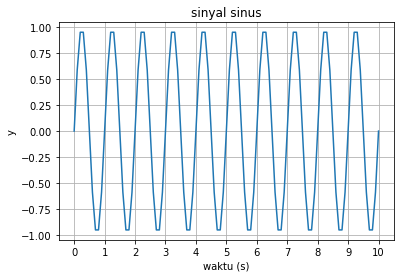

In [5]:
plt.plot(times,sinus)
plt.title('sinyal sinus')
plt.xlabel('waktu (s)')
plt.ylabel('y')
plt.xticks(np.arange(start,end+1,1))
plt.grid()
plt.show()

## Penjumlahan & Pengurangan Deret Data

In [6]:
print(f'deret pertama: {deret1}')
print(f'deret kedua: {deret2}')
print(f'penjumlahan deret: {np.array(deret1) + np.array(deret2)}')
print(f'pengurangan deret: {np.array(deret1) - np.array(deret2)}')

deret pertama: [1, 3, 5, 7, 9, 11]
deret kedua: [0, 2, 4, 6, 8, 10]
penjumlahan deret: [ 1  5  9 13 17 21]
pengurangan deret: [1 1 1 1 1 1]


## Nyquist
> Dipopulerkan oleh **Nyquist-Shannon** (Harry Nyquist dan Claude Shannon). Teorema nyquist berbicara mengenai proses untuk mencuplik (mengambil) sinyal analog secara diskrit dengan periode atau frekuensi pencuplikan, proses ini mengubah representasi sinyal yang tadinya berupa sinyal kontinyu menjadi sinyal diskrit. Nyquist-Shannon memberikan aturan bahwa frekuensi cuplikan minimal harus 2 kali lipat dari frekuensi maksimumnya, tujuanya adalah untuk mempertahankan semua komponen frekuensi dalam sinyal tersebut 

secara matematis:
$$ freq.nyquist = \frac{1}{2 interval sampling}$$

In [7]:
t = np.arange(0,1+0.001,0.001)
f = 2
y = np.sin(2*np.pi*f*t)
print(len(y))
print(len(t))

1001
1001


1001


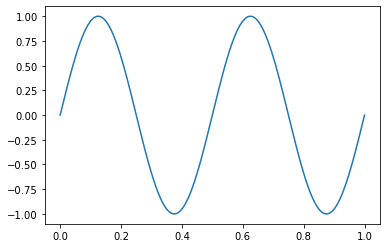

In [8]:
plt.plot(t,y)
print(len(y))

In [9]:
t1 = np.arange(0,1+(1/f),1/f) # periode
y1 = np.sin(2*np.pi*f*t1)
print(y1)

[ 0.0000000e+00 -2.4492936e-16 -4.8985872e-16]


<StemContainer object of 3 artists>

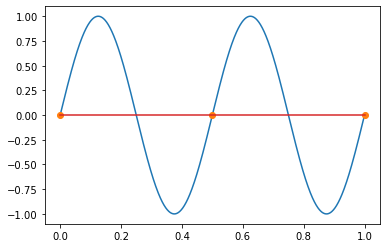

In [10]:
plt.plot(t,y)
plt.stem(t1,y1,'orange', markerfmt='o',use_line_collection=True)

In [11]:
t2 = np.arange(0,1+(1/(2*f)),1/(2*f))
y2 = np.sin(2*np.pi*f*t2)
print(y2)

[ 0.0000000e+00  1.2246468e-16 -2.4492936e-16  3.6739404e-16
 -4.8985872e-16]


<StemContainer object of 3 artists>

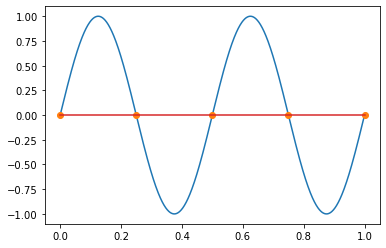

In [12]:
plt.plot(t,y)
plt.stem(t2,y2,'orange', markerfmt='o',use_line_collection=True)

In [13]:
t3 = np.arange(0,1+(1/(2.5*f)),1/(2.5*f))
y3 = np.sin(2*np.pi*f*t3)
print(y3)

[ 0.00000000e+00  5.87785252e-01 -9.51056516e-01  9.51056516e-01
 -5.87785252e-01 -4.89858720e-16]


<StemContainer object of 3 artists>

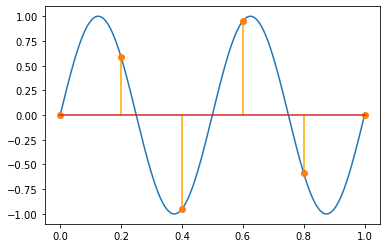

In [14]:
plt.plot(t,y)
plt.stem(t3,y3,'orange', markerfmt='o',use_line_collection=True)

In [15]:
t4 = np.arange(0,1+(1/(3*f)),1/(3*f))
y4 = np.sin(2*np.pi*f*t4)
# print(len(y4))
# print(len(t4))
# print(y4,t4)
# print(y)

<StemContainer object of 3 artists>

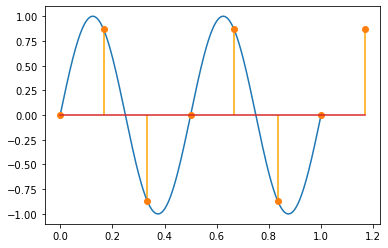

In [16]:
plt.plot(t,y)
plt.stem(t4,y4,'orange', markerfmt='o',use_line_collection=True)

In [17]:
t5 = np.arange(0,1+(1/(10*f)),1/(10*f))
y5 = np.sin(2*np.pi*f*t5)
print(len(y5))
print(len(t5))

21
21


<StemContainer object of 3 artists>

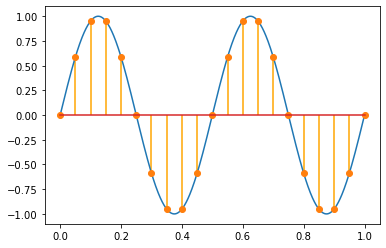

In [18]:
plt.plot(t,y)
plt.stem(t5,y5,'orange', markerfmt='o',use_line_collection=True)

In [19]:
t6 = np.arange(0,1+(1/(30*f)),1/(30*f))
y6 = np.sin(2*np.pi*f*t6)
print(y6)

[ 0.00000000e+00  2.07911691e-01  4.06736643e-01  5.87785252e-01
  7.43144825e-01  8.66025404e-01  9.51056516e-01  9.94521895e-01
  9.94521895e-01  9.51056516e-01  8.66025404e-01  7.43144825e-01
  5.87785252e-01  4.06736643e-01  2.07911691e-01  1.22464680e-16
 -2.07911691e-01 -4.06736643e-01 -5.87785252e-01 -7.43144825e-01
 -8.66025404e-01 -9.51056516e-01 -9.94521895e-01 -9.94521895e-01
 -9.51056516e-01 -8.66025404e-01 -7.43144825e-01 -5.87785252e-01
 -4.06736643e-01 -2.07911691e-01 -2.44929360e-16  2.07911691e-01
  4.06736643e-01  5.87785252e-01  7.43144825e-01  8.66025404e-01
  9.51056516e-01  9.94521895e-01  9.94521895e-01  9.51056516e-01
  8.66025404e-01  7.43144825e-01  5.87785252e-01  4.06736643e-01
  2.07911691e-01  3.67394040e-16 -2.07911691e-01 -4.06736643e-01
 -5.87785252e-01 -7.43144825e-01 -8.66025404e-01 -9.51056516e-01
 -9.94521895e-01 -9.94521895e-01 -9.51056516e-01 -8.66025404e-01
 -7.43144825e-01 -5.87785252e-01 -4.06736643e-01 -2.07911691e-01
 -4.89858720e-16]


<StemContainer object of 3 artists>

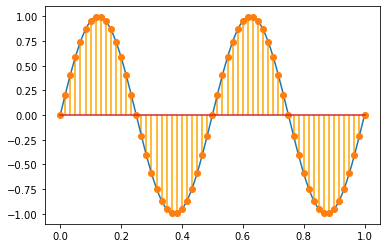

In [20]:
plt.plot(t,y)
plt.stem(t6,y6,'orange', markerfmt='o',use_line_collection=True)

## Konvolusi dan Korelasi

### Konvolusi

> **Konvolusi** merupakan cara untuk mengkombinasikan dua buah sinyal menjadi bentuk sinyal lain atau dapat juga di pahami sebagai cara untuk mengkombinasikan dua buah deret angka sehingga menghasilkan deret angka ketiga. Deret angka yang dimaksud seperti **rekaman seismik**, **reflektifitas bumi**, atau **wavelet sumber gelombang**.

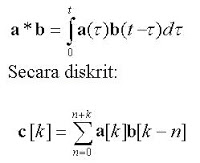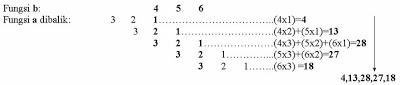

In [21]:
from scipy.signal import convolve, correlate

In [22]:
sinyal_a = [1,2,3]
sinyal_b = [4,5,6]
convo = convolve(sinyal_a, sinyal_b)
print(convo)

[ 4 13 28 27 18]


### Contoh
#### Dummy Data

In [23]:
time = np.linspace(0, 10, 100)
koefisien_refleksi = np.zeros(100)
koefisien_refleksi[60] = -0.7
koefisien_refleksi[50] = 0.8

#### Ricker Wavelet
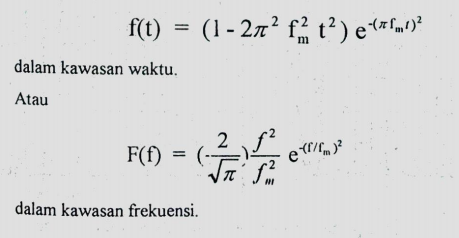

In [24]:
def ricker_wavelet(f,tn,dt):
    t = np.arange(-tn/2,tn/2+dt,dt)/1000
    w = (1-2*np.pi**2*f**2*t**2)*np.exp(-np.pi**2*f**2*t**2)
    return t, w

frekuensi = 10
sampling_rate = 4
waktu = 100
t,w = ricker_wavelet(frekuensi,waktu,sampling_rate)

In [25]:
synthetic = convolve(koefisien_refleksi,w, mode = 'same')

#### Visualisasi

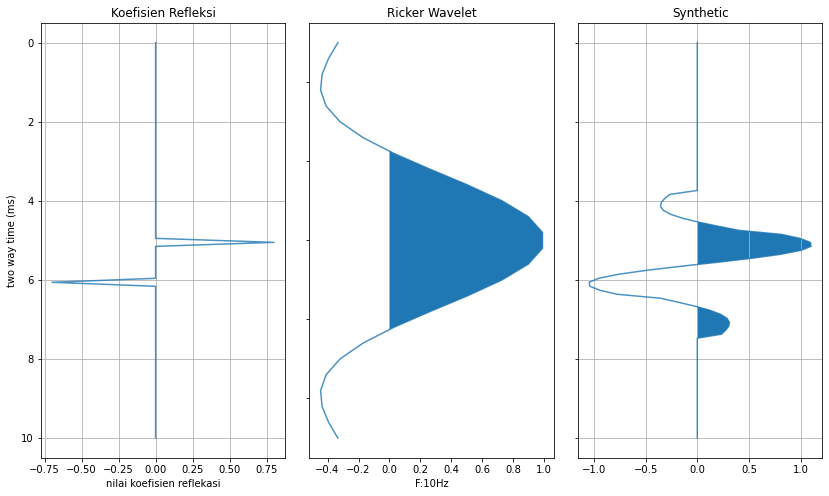

In [26]:
fig, ax = plt.subplots(1,3, sharey=False, figsize = (14,8), gridspec_kw={'width_ratios': [2,2,2]})
fig.subplots_adjust(wspace=0.1)

ax[0].set_title('Koefisien Refleksi')
ax[0].plot(koefisien_refleksi,time, alpha=0.8)
ax[0].grid()
ax[0].set_ylabel('two way time (ms)')
ax[0].set_xlabel('nilai koefisien reflekasi')
ax[0].invert_yaxis()

ax[1].set_title('Ricker Wavelet')
ax[1].plot(w,t+0.1, alpha=0.8)
ax[1].fill_betweenx(t+0.1, w,  0,  w > 0, interpolate=True)
ax[1].set_xlabel('F:'+ str(frekuensi)+'Hz')
ax[1].set_yticklabels('')
ax[1].invert_yaxis()

ax[2].set_title('Synthetic')
ax[2].plot(synthetic, time, alpha=0.8)
ax[2].fill_betweenx(time, synthetic,  0,  synthetic > 0, interpolate=True)
ax[2].grid()
ax[2].set_yticklabels('')
ax[2].invert_yaxis()

### Cross-korelasi
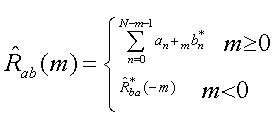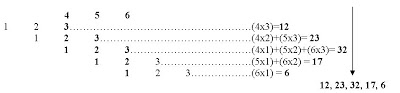

In [27]:
cross_corr1 = correlate(sinyal_b, sinyal_a)
cross_corr2 = correlate(sinyal_a, sinyal_b)
print(f'cross korelasi (sinyal_b, sinyal_a): {cross_corr1}')
print(f'cross korelasi (sinyal_a, sinyal_b): {cross_corr2}')

cross korelasi (sinyal_b, sinyal_a): [12 23 32 17  6]
cross korelasi (sinyal_a, sinyal_b): [ 6 17 32 23 12]


#### Visualisasi Cross Korelasi

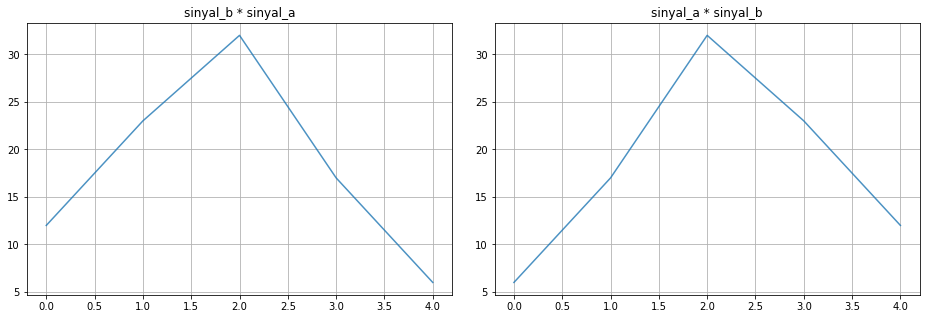

In [28]:
fig, ax = plt.subplots(1,2, sharey=False, figsize = (16,5), gridspec_kw={'width_ratios': [2,2]})
fig.subplots_adjust(wspace=0.1)

ax[0].set_title('sinyal_b * sinyal_a')
ax[0].plot(cross_corr1, alpha=0.8)
ax[0].grid()

ax[1].set_title('sinyal_a * sinyal_b')
ax[1].plot(cross_corr2, alpha=0.8)
ax[1].grid()

### Auto-korelasi

In [29]:
auto_corr1 = correlate(sinyal_a, sinyal_a)
auto_corr2 = correlate(sinyal_b, sinyal_b)
print(f'auto korelasi (sinyal_a, sinyal_a): {auto_corr1}')
print(f'auto korelasi (sinyal_b, sinyal_b): {auto_corr2}')

auto korelasi (sinyal_a, sinyal_a): [ 3  8 14  8  3]
auto korelasi (sinyal_b, sinyal_b): [24 50 77 50 24]


#### Visualisasi Auto Korelasi

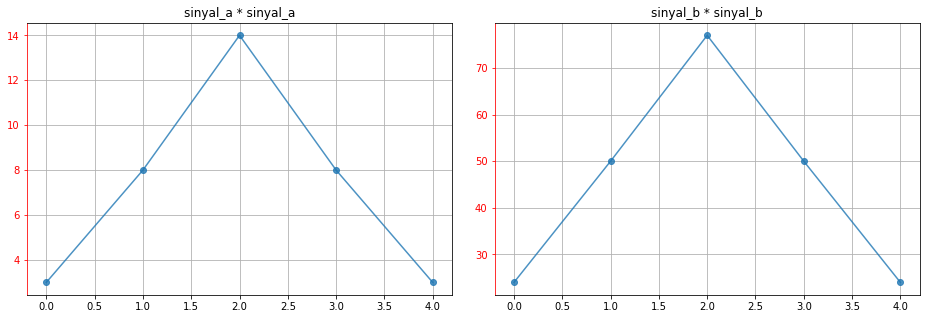

In [30]:
fig, ax = plt.subplots(1,2, sharey=False, figsize = (16,5), gridspec_kw={'width_ratios': [2,2]})
fig.subplots_adjust(wspace=0.1)

ax[0].set_title('sinyal_a * sinyal_a')
ax[0].plot(auto_corr1, '-o', alpha=0.8)
ax[0].tick_params(axis='y', colors='red')
ax[0].spines['left'].set_color('red')
ax[0].grid()

ax[1].set_title('sinyal_b * sinyal_b')
ax[1].plot(auto_corr2, '-o', alpha=0.8)
ax[1].tick_params(axis='y', colors='red')
ax[1].spines['left'].set_color('red')
ax[1].grid()

<footer style="width: 100%; background-color: #eaeaea;">
    <br>
    <p style="text-align: center;">Made with 🚀 2021 Yusuf Umar Al Hakim. All Rights Reserved</p>
    <br>
</footer>